In [1]:
%pylab inline
plt.style.use("bmh")
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


## Model Quality

In [187]:
arr1 = np.zeros(1600)
arr1[:1235]=1

In [188]:
stats.ttest_1samp(arr1, 0.75,alternative='greater')

Ttest_1sampResult(statistic=2.084550233397783, pvalue=0.018634249756415963)

we reject the null hypothesis that they are the same. 

In [189]:
bootstrapped_mean = [np.random.choice(arr1,size=1600,replace=True).mean() for x in range(100000)]

In [190]:
a = np.array(bootstrapped_mean)
len(a[a>0.75])/len(a)

0.97916

We get a mean greater than 0.75 in 0.97937 of the cases.

In [192]:
import pandas as pd

## Comparing salaries

In [193]:
salaries_1 = np.loadtxt('https://gist.githubusercontent.com/avidale/11fcdcb0ed24f842a75dd3c261cdb202/raw/7220a1c692e448428432c491b245a6d97abd97ea/salaries1.txt')

In [194]:
salaries_2= np.loadtxt('https://gist.githubusercontent.com/avidale/11fcdcb0ed24f842a75dd3c261cdb202/raw/7220a1c692e448428432c491b245a6d97abd97ea/salaries2.txt')

In [200]:
stats.ttest_ind(salaries_1, salaries_2, equal_var=False)

Ttest_indResult(statistic=-2.129970166236807, pvalue=0.034916573358014256)

We reject the null hypothesis that salaries are the same.

### Counting bombs

In [203]:
def f(g,n):
    return 576*g**n*np.exp(-g)/np.math.factorial(n)

In [204]:
g = 537/576
original_vals = [229,211,93,35,7,1]
estimated_vals = [f(g,x) for x in np.arange(6)]

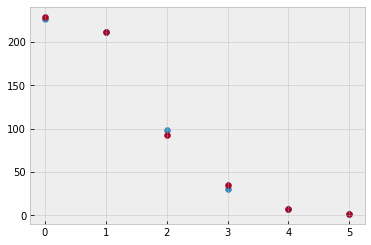

In [205]:
plt.scatter(np.arange(6),estimated_vals)
plt.scatter(np.arange(6),original_vals)

In [207]:
out = []
for i,v in enumerate(estimated_vals):
    out.append((original_vals[i] - v)**2/v)

In [208]:
t_statistic = np.sum(out)

In [211]:
# create chi2 dist with 4 dof
rv = stats.chi2(df=4)

In [212]:
pvalue = 1- rv.cdf(np.sum(out))
pvalue

0.9028642674873831

We cant reject that they are the same.

## simulation of 2 ppl going to bar

In [8]:
# simulation solution 
possible_vals = np.linspace(0,60,100000)
def g():
    return np.random.choice(possible_vals)-np.random.choice(possible_vals)



In [5]:
arr = np.array([g() for x in range(100000)])
arr_earlier = arr[arr>0]

In [6]:
len(arr[arr>10])/len(arr)

0.34673

In [11]:
arr =np.array([g() for x in range(1000000)])
# len(arr[np.abs(arr) > 10/len(arr)])
arr

array([ -6.20106201,  22.3898239 ,   1.05721057, ...,   3.26163262,
       -31.24531245, -23.4800348 ])

In [13]:
len(arr[np.abs(arr) > 10])/len(arr)


0.694364

In [14]:
## analytic / geometric solution
2*(5/6)**2/2

0.6944444444444445

### Diagnostics

In [233]:
#simulation

N = 1000000
arr = np.zeros(N)
arr[:int(0.01*N)] = 1

In [234]:
import pandas as pd

In [235]:
df = pd.DataFrame(arr,columns=['is_sick'])

In [236]:
def foo(is_sick):
    if is_sick == 1:
        return int(np.random.normal(25,1))
    elif is_sick == 0:
        return int(np.random.normal(20,1))


In [223]:
# rounding
def foo(is_sick):
    if is_sick == 1:
        return round(np.random.normal(25,1))
    elif is_sick == 0:
        return round(np.random.normal(20,1))

In [237]:
df['prot_conc']=df.is_sick.apply(foo)
df_sick = df[df.is_sick==1]

In [238]:
df_sick.groupby('prot_conc').size()/df.groupby('prot_conc').size()

prot_conc
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20    5.916388e-07
21    1.017961e-04
22    1.028797e-02
23    5.113212e-01
24    9.916125e-01
25    9.998822e-01
26    1.000000e+00
27    1.000000e+00
28    1.000000e+00
dtype: float64

#### P(sick|x=20) = 0.000003
#### P(sick|x=23) = 0.501513
#### P(sick|x=25) = 1.000000

In [537]:
import seaborn as sns

In [252]:
def foo2(x):
    return 0.01*stats.norm.pdf(x,loc=25,scale=1)/(0.99*stats.norm.pdf(x,loc=20,scale=1) + 0.01*stats.norm.pdf(x,loc=25,scale=1))

In [254]:
[(x,foo2(x)) for x in range(15,30)]

[(15, 5.227833339193807e-19),
 (16, 7.758792611315248e-17),
 (17, 1.1515069222670123e-14),
 (18, 1.708987800618423e-12),
 (19, 2.5363627829364664e-10),
 (20, 3.7642959917135503e-08),
 (21, 5.586679598410775e-06),
 (22, 0.0008284544943219435),
 (23, 0.1095720515588477),
 (24, 0.9480871535685076),
 (25, 0.9996311974015023),
 (26, 0.9999975141170154),
 (27, 0.9999999832502108),
 (28, 0.9999999998871407),
 (29, 0.9999999999992395)]

In [242]:
0.01*stats.norm.pdf(23,loc=20,scale=1)/(0.99*stats.norm.pdf(23,loc=25,scale=1) + 0.01*stats.norm.pdf(23,loc=20,scale=1))

0.0008284544943219435

In [226]:
def px(x):
    return (1/(2*np.pi)**0.5)*(0.01*np.exp(-0.5*(x-25)**2) + 0.99*np.exp(-0.5*(x-20)**2))

In [167]:
px(25)

0.003990894656333914

In [228]:
[(x, bayes_combine(x)) for x in range(5,30)]

[(5, 1.0083182758150755e-40),
 (6, 1.4964770069457852e-38),
 (7, 2.2209688012519246e-36),
 (8, 3.296209960620608e-34),
 (9, 4.892009333210839e-32),
 (10, 7.2603855950111e-30),
 (11, 1.0775367624584376e-27),
 (12, 1.5992063496561942e-25),
 (13, 2.373432664093755e-23),
 (14, 3.5224863959539864e-21),
 (15, 5.227833339193807e-19),
 (16, 7.758792611315248e-17),
 (17, 1.1515069222670123e-14),
 (18, 1.7089878006184226e-12),
 (19, 2.536362782936466e-10),
 (20, 3.7642959917135503e-08),
 (21, 5.586679598410775e-06),
 (22, 0.0008284544943219435),
 (23, 0.10957205155884772),
 (24, 0.9480871535685076),
 (25, 0.9996311974015021),
 (26, 0.9999975141170154),
 (27, 0.999999983250211),
 (28, 0.9999999998871407),
 (29, 0.9999999999992397)]

In [496]:
np.sum([px(x) for x in range(5,30)])

0.9999999904225307

In [172]:
def px(x):
    return (1/(2*np.pi)**0.5)*(0.01*np.exp(-0.5*(x-25)**2) + 0.99*np.exp(-0.5*(x-20)**2))

In [173]:
def px_sick(x):
    return (1/(2*np.pi)**0.5)*(np.exp(-0.5*(x-25)**2))

In [174]:
def px_healthy(x):
    return (1/(2*np.pi)**0.5)*(np.exp(-0.5*(x-20)**2))

In [175]:
def bayes_combine(x):
    return (px_sick(x)*0.01)/px(x)

In [176]:
0.01*px_sick(25) + 0.99*px_healthy(25)

0.0039908946563339135

In [562]:
assert px(25) - (0.01*px_sick(25) + 0.99*px_healthy(25)) <0.00001

In [558]:
bayes_combine(24)

0.9480871535685076

In [4]:
256*(0.5*1.25+0.8*0.5)**4

282.5760999999999

In [9]:
256*(1.25)**3*0.8**1

400.0

In [14]:
0.5**4*325+4*0.5**4*100

45.3125

In [15]:
380*0.9-1.64*(380*0.9*0.1)**0.5

332.409154364708

In [24]:
from scipy import stats

In [25]:
stats.norm.cdf(345, loc=370, scale=37**0.5)

1.978512496172632e-05

In [32]:
2*stats.norm.cdf(10.4,loc=10.5,scale=(0.0025)**0.5)+2* stats.norm.cdf(3.15,loc=3.2,scale=(0.0036)**0.5)

0.4501570258236427

In [36]:
1 - (stats.norm.cdf(10.6,loc=10.5,scale=(0.0025)**0.5)-stats.norm.cdf(10.4,loc=10.5,scale=(0.0025)**0.5))*(stats.norm.cdf(3.25,loc=3.2,scale=(0.0036)**0.5)-stats.norm.cdf(3.15,loc=3.2,scale=(0.0036)**0.5))

0.43174503636850714

In [28]:
1-stats.norm.cdf(10.6,loc=10.5,scale=(0.0025)**0.5)

0.022750131948179653

In [40]:
(0.0025)**0.5

0.05

In [43]:
75+4.3*(25+75)**0.5

118.0

In [45]:
75+4.3*(44.5/3)**0.5

91.56104867855092

In [48]:
arr = np.array([1, 1, 2, 3, 5, 8, 10, 21, 38,81])

In [52]:
((arr-arr.mean())**2).sum()/(len(arr)-1)

640.0

In [55]:
arr.var(ddof=1)

640.0

In [62]:
17-1.96*(arr.var()/len(arr))**0.5

2.1246458865679436

In [119]:
arr = np.array([70,70,85])
arr_mean = arr.mean()
arr_s2 = arr.var(ddof=1)

In [65]:
from scipy import stats 

In [91]:
dist = stats.norm.rvs(loc = arr_mean, scale = arr_s2**0.5,size=1000)

In [136]:
dist = stats.t.rvs(loc = arr_mean, scale = arr_s2**0.5,size=1000,df=2)

In [142]:
dist = stats.t.rvs(loc = arr_mean, scale = arr_s2**0.5,size=1000,df=2)
print(75+np.quantile(dist,0.975))
print(75-np.quantile(dist,0.025))


190.97634021544275
36.92584860985678


In [112]:
stats.t.cdf(39,loc=arr_mean,scale=arr_s2**0.5,df=2)

0.026643485265604717

In [125]:
stats.t.ppf(0.025,loc=arr_mean,scale=(arr_s2/3)**0.5,df=2)

53.48673635044362